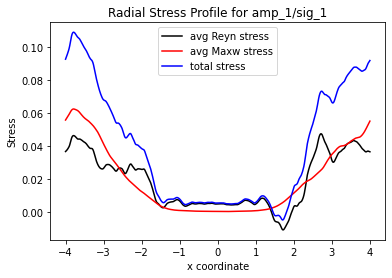

done with ./ad_prof/amp_1/sig_1


In [36]:
import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read

def oned_stress_profile(file_name):
    #print('current file is :'+file_name)
    title=file_name[10:-20]
    title = '1-D stress radial profile for ' +title
    data = athena_read.athdf(file_name)
    #print(data)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    #print(volume,' volume')
    
    #constants
    omega0 = 1.0
    qshear = 1.5
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    data_arr = []
    #array of vshear possible values
    vsh = -qshear*omega0*data['x1v']
    vsh_3d = np.broadcast_to(vsh,(Nz,Ny,Nx))
    #adjust vel y minus the shear velocity
    vely = data['vel2']-vsh_3d
    #reynolds stress
    reyn = data['rho']*vely*data['vel1']
    #average across y and z
    reyn = np.sum(reyn,axis=(0,1))/(Nz*Ny)
    #divide by density profile
    rho_prof = np.sum(data['rho'],axis=(0,1))/(Nz*Ny)
    reyn = reyn/rho_prof
    #maxewell stress -BxBy
    maxw=-1*data['Bcc2']*data['Bcc1']
    maxw=np.sum(maxw,axis=(0,1))/(Nz*Ny)
    maxw= maxw/rho_prof
    radial_dim = data['x1f'][-1]-data['x1f'][0]
    div_vol = radial_dim*side_length

    #print(np.shape(data_arr))

    #plotting section
    #plt.pcolormesh(data_arr,norm=mpl.colors.CenteredNorm(vcenter =0),shading = 'gouraud',cmap = 'RdBu_r')
    #plt.colorbar()
    #plt.xlabel('x cell')
    #plt.ylabel('Reynolds Stress')
    #plt.title(title)
    #plt.show()
    #plt.plot(range(512),reyn)
    return(reyn,maxw)

#print(oned_stress_profile('./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf'))
#iterate over last 10 outputs
def avg_stress_prof(file_path):
    prof_list_reyn = []
    prof_list_maxw = []
    x_arr = np.linspace(-4,4,512)
    for i in range(10):
        if i == 0:
            fname = file_path+'/HGB.out2.00100.athdf'
        else:
            fname = file_path+'/HGB.out2.000'+str(100-i)+'.athdf'
        lbl = str(100-i)
        reyn_list,maxw_list=oned_stress_profile(fname)
        prof_list_reyn.append(reyn_list)
        prof_list_maxw.append(maxw_list)
    #convert to numpy
    prof_list_reyn = np.array(prof_list_reyn)
    prof_list_maxw = np.array(prof_list_maxw)
    #plt.plot(x_arr,prof_list[i],color = 'c')

    prof_avg_reyn = np.sum(prof_list_reyn,axis=0)/len(prof_list_reyn)
    prof_avg_maxw = np.sum(prof_list_maxw,axis=0)/len(prof_list_maxw)
    plt.plot(x_arr,prof_avg_reyn,label='avg Reyn stress',color = 'k')
    plt.plot(x_arr,prof_avg_maxw,label='avg Maxw stress',color = 'r')
    plt.plot(x_arr,(prof_avg_maxw+prof_avg_reyn),label='total stress',color='b')
    plt.legend()
    plt.xlabel('x coordinate')
    plt.ylabel('Stress')
    title = 'Radial Stress Profile for '+file_path[10:]
    plt.title(title)
    plt.show()
    return('done with '+file_path)
print(avg_stress_prof('./ad_prof/amp_1/sig_1'))

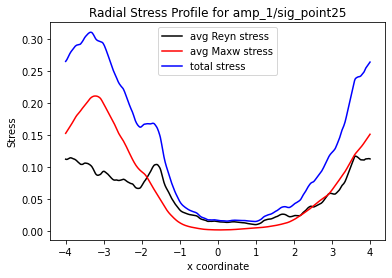

done with ./ad_prof/amp_1/sig_point25


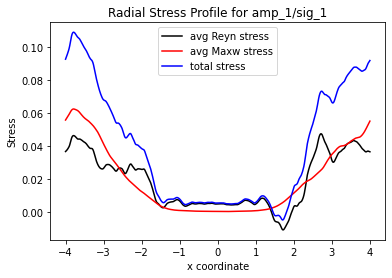

done with ./ad_prof/amp_1/sig_1


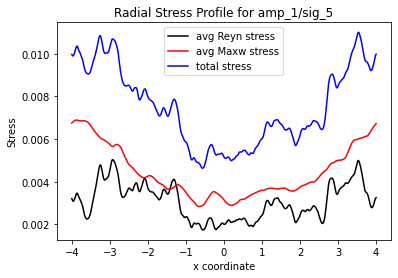

done with ./ad_prof/amp_1/sig_5


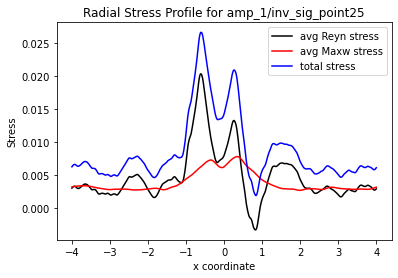

done with ./ad_prof/amp_1/inv_sig_point25


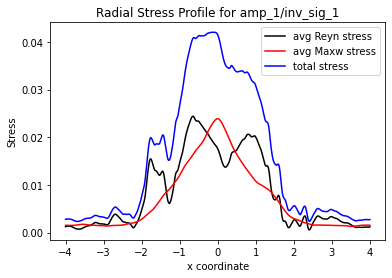

done with ./ad_prof/amp_1/inv_sig_1


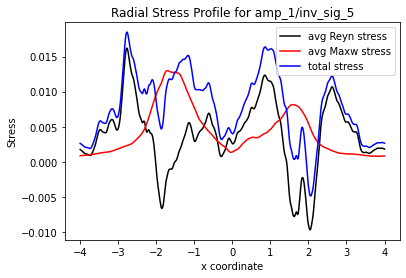

done with ./ad_prof/amp_1/inv_sig_5


In [37]:
#iteration over all the Am=1 cases
file_name_list = [
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5"]

for pathname in file_name_list:
    print(avg_stress_prof(pathname))
    plt.show()